# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [4]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pandas as pd


Paso 2

In [5]:
encabezados_http = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/120.0.0.0 Safari/537.36"
}

resourse_url = "https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records"
response = requests.get(resourse_url, headers=encabezados_http, timeout=5)
print("codigo respuesta", response.status_code)
print("contenido", response.content)
if response.status_code == 200:
    with open("List_of_Spotify_streaming_records", "wb") as dataset:
        dataset.write(response.content)

codigo respuesta 200
contenido b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>List of Spotify streaming records - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1

Paso 3

In [13]:
tablas = pd.read_html("List_of_Spotify_streaming_records")


df_spotify = tablas[0]
df_spotify.head()

,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,5.059,29 November 2019,[1]
1,2,"""Shape of You""",Ed Sheeran,4.580,6 January 2017,[2]
2,3,"""Starboy""",The Weeknd and Daft Punk,4.127,21 September 2016,[3]
3,4,"""Someone You Loved""",Lewis Capaldi,4.076,8 November 2018,[4]
4,5,"""Sweater Weather""",The Neighbourhood,4.068,3 December 2012,[5]


Paso 4

In [14]:
df_spotify["Song"] = df_spotify["Song"].str.replace('"', '', regex=False)
df_spotify.rename(columns={"Artist(s)": "Artists"}, inplace=True)
df_spotify.drop(columns=['Ref.'], inplace=True)
df_spotify.head()

,Rank,Song,Artists,Streams (billions),Release date
0,1,Blinding Lights,The Weeknd,5.059,29 November 2019
1,2,Shape of You,Ed Sheeran,4.580,6 January 2017
2,3,Starboy,The Weeknd and Daft Punk,4.127,21 September 2016
3,4,Someone You Loved,Lewis Capaldi,4.076,8 November 2018
4,5,Sweater Weather,The Neighbourhood,4.068,3 December 2012


Paso 5

In [19]:

# Crear conexión
conn = sqlite3.connect("mi_base_de_datos.db")


# Guardar el DataFrame en SQLite
df_spotify.to_sql("spotify_streams", conn, if_exists="replace", index=False)

# Cerrar conexión
conn.commit()
conn.close()




Paso 6

/tmp/ipykernel_1308/3473204655.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top15, y="Song", x="Streams (billions)", palette="viridis")


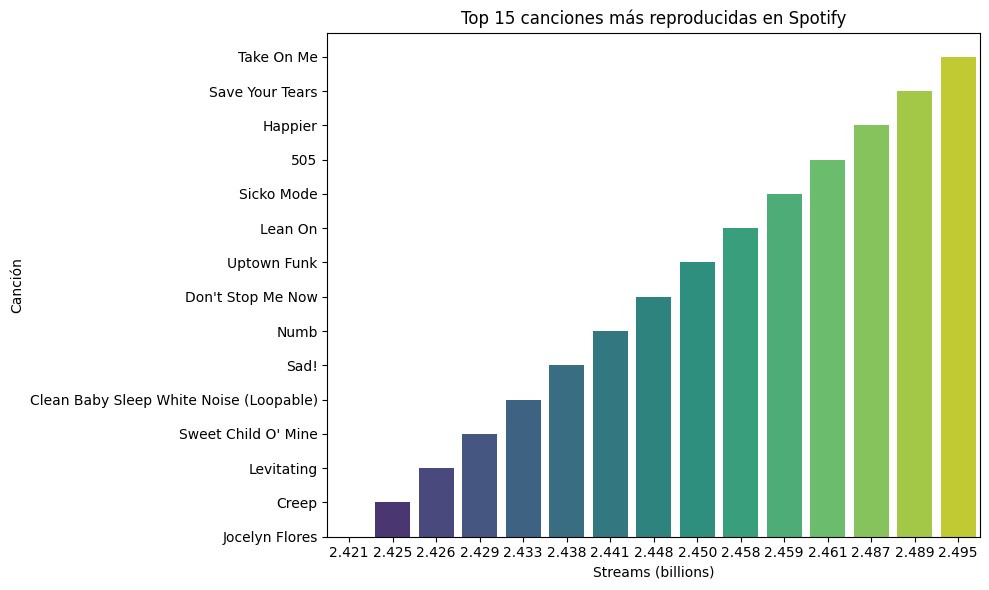

In [ ]:

# Top 15 canciones más reproducidas
df_top15 = df_spotify.sort_values(by="Streams (billions)", ascending=True).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_top15, y="Song", x="Streams (billions)", palette="viridis")

plt.title("Top 15 canciones más reproducidas en Spotify")
plt.xlabel("Streams (billions)")
plt.ylabel("Canción")


plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()
